# Maternal Health Risk Data

Resolveremos aquí el ejercicio planteado en [esta competición de Kaggle](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data).

Estos serán los pasos que daremos:
- Primeramente, cargar los datos, leyéndolos mediante `read_csv` de pandas.
- Después, analizaremos y exploraremos las variables de entrada (características de entrada) así como la variable objetivo.
- Crearemos los conjuntos de entrenamiento y de test, junto con validación cruzada
- Implementaremos/crearemos nuestros primeros modelos predictivos (usando SVMs o Árboles de Decisión).
- Evaluaremos el rendimiento de los modelos.
- Presentaremos los resultados


# Evaluación del trabajo
- Entregar lo que se ha hecho en clase tal cual, 5 puntos.
- Entregar lo realizado en clase comentando/desarrollando más en detalle qué se ha hecho y con explicaciones, 7 puntos.
- Entregar todos los pasos (cargar los datos, exploración, creación conjunto de entrenamiento/test, un modelo y evaluación), con comentarios y explicaciones, 9 puntos.
- Lo mismo que el punto anterior más haciendo algo adicional como:
  - Segmentación (podéis usar k-means y ver los resultados)
  - Un algoritmo de aprendizaje no visto (p.e., SVM RBF, Logistic Regression, etc...)
  - Comparar varias normalizaciones de datos, ...
  
  Esto serían 10 puntos.


In [26]:
import pandas as pd

# Exploración de datos

En esta sección vamos a cargar/leer los datos, a explorar qué valores tienen, qué aspecto presentan y qué posibles relaciones existen entre ellos.

Este paso es esencial para entender más en detalle cómo abordar el problema.

In [9]:
# Guardar los datos en un directorio de tu ordenador (o Google Colab) y leerlos con pandas


In [10]:
ruta_archivo = r'C:\L\Curso 2022-23\2º cuatrimestre\Inteligencia Artificial\Ejercicio 1\Maternal Health Risk Data Set.csv'
datos = pd.read_csv(ruta_archivo)


In [11]:
datos

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [12]:
# Miramos cómo es una pequeña muestra de datos.


In [13]:
datos.sample(10)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
551,21,75,50,7.5,98.0,60,low risk
78,35,120,80,6.9,98.0,78,mid risk
668,15,90,49,6.7,99.0,77,low risk
679,35,85,60,11.0,102.0,86,high risk
430,25,120,100,6.8,98.0,60,low risk
445,23,99,60,6.8,98.0,76,low risk
633,19,120,85,9.0,98.0,60,mid risk
330,35,120,60,6.9,98.0,70,low risk
757,22,85,60,6.9,98.0,76,mid risk
109,32,140,100,7.9,98.0,78,high risk


In [14]:
# Resumen de datos de un DataFrame
# Esto nos ayuda a ver anomalías


In [15]:
datos.describe() #Resmuen de datos de un data frame 


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


¿Qué puedo decir sobre la exploración de datos?

- ¿Qué conclusiones podemos sacar de los datos?

El conjunto de datos representa a pacientes de diferentes hospitales, clínicas comunitarias y centros de atención de salud materna, lo que sugiere que los datos pueden ser representativos de la población general.

La presión arterial, la concentración de azúcar en sangre, la temperatura corporal y la frecuencia cardíaca son variables comunes que se miden en los controles de salud y se usan para evaluar la salud general de los pacientes.

La mayoría de los pacientes parecen estar dentro de los rangos normales para cada una de las variables medidas, lo que sugiere que el monitoreo del riesgo a través del sistema IoT puede ser efectivo para detectar y prevenir problemas de salud en una etapa temprana.

Los valores atípicos, como la concentración de azúcar en sangre de 19.0 mmol/L, pueden indicar la presencia de problemas de salud que requieren más atención y seguimiento.

Dado que estos datos se obtuvieron a través de un sistema de monitoreo basado en IoT, podemos suponer que los datos se recopilaron de manera más automatizada y en tiempo real, lo que puede mejorar la calidad de los datos y proporcionar una visión más precisa del estado de salud de los pacientes.

En resumen, los resultados de la tabla sugieren que el monitoreo del riesgo a través del sistema IoT puede ser efectivo para detectar problemas de salud en una etapa temprana y proporcionar una visión precisa del estado de salud de los pacientes. Sin embargo, se necesitaría más información sobre la naturaleza específica del sistema IoT y la población de pacientes incluida en el conjunto de datos para llegar a conclusiones más precisas y detalladas.


- ¿Qué datos hay anómalos? 

Basándonos en los valores mínimo y máximo de cada columna, podríamos considerar como datos anómalos los siguientes:

SystolicBP: valores mínimos de 70 y máximos de 160 podrían ser considerados anómalos en ciertos contextos de estudio.

DiastolicBP: valores mínimos de 49 y máximos de 100 podrían ser considerados anómalos en ciertos contextos de estudio.

BS: un valor máximo de 19 podría ser considerado anómalo dependiendo del contexto del estudio.

HeartRate: un valor mínimo de 7, no corresponde con la relaidad, es un valor anómalo, ya que fisiológicamente es imposible tener una heart rate de 7.

- ¿Están los datos en las escalas que esperamos? 
Se puede determianr que la medida de BodyTemp no está en grados celsius o centigrados 

- ¿Puede afectar cambios de escala al problema a resolver?
Sí, los cambios de escala pueden afectar el problema a resolver en ciertos casos.

Por ejemplo, si se están utilizando modelos de aprendizaje automático para resolver un problema y los datos tienen diferentes escalas, es posible que algunos atributos tengan un impacto mucho mayor en el modelo que otros simplemente porque tienen valores numéricos mucho mayores. Esto puede llevar a una falta de precisión o a resultados no deseados en el modelo. En este caso, normalizar o estandarizar las escalas puede ser una solución para asegurarse de que todas las variables tengan un impacto similar en el modelo.

Otro ejemplo podría ser en el análisis estadístico de datos, donde las medidas de tendencia central y de dispersión, como la media y la desviación estándar, pueden verse afectadas por las diferentes escalas. En este caso, normalizar o estandarizar las escalas puede ayudar a hacer comparaciones significativas entre las variables.

En general, es importante tener en cuenta la escala de los datos y cómo puede afectar el análisis o el modelo a construir.





In [16]:
datos.info()
# Resumen de datos (otra alternativa)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Siempre es interesante entender qué relación existe entre variables (siempre que haya un número pequeño de éstas). 

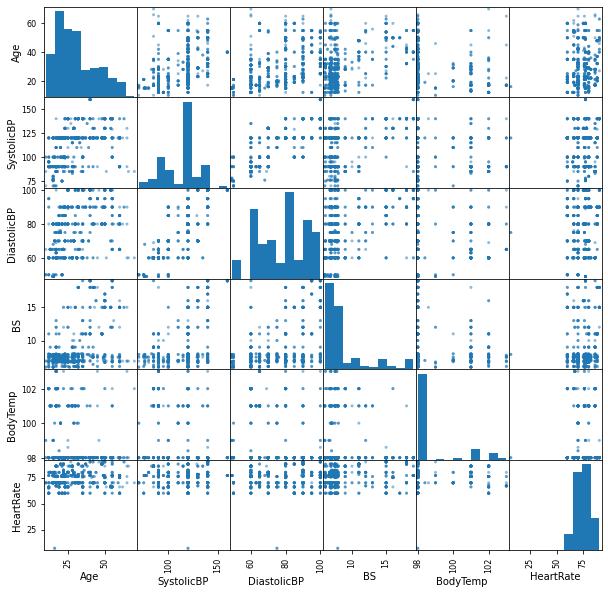

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/L/Curso 2022-23/2º cuatrimestre/Inteligencia Artificial/Ejercicio 1/Maternal Health Risk Data Set.csv')

pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()
# Correlación entre variables

- ¿Qué relación observo entre variables?
Podemos ver:
  -La variable heart rate oscila entre 60 y 90, en relacion a todas la variables. 
  -La variable BodyTemp, apenas se realiona con las demás variables. 
  
  
  
- ¿Qué variables son las más relacionadas entre sí?
    -Heart Rate y BS
    - BS y age 
    -Heart rate y age
    
       
- ¿Cómo se relacionan estas variables con la variable objetivo (`RiskLevel`)?

***siguiente step***

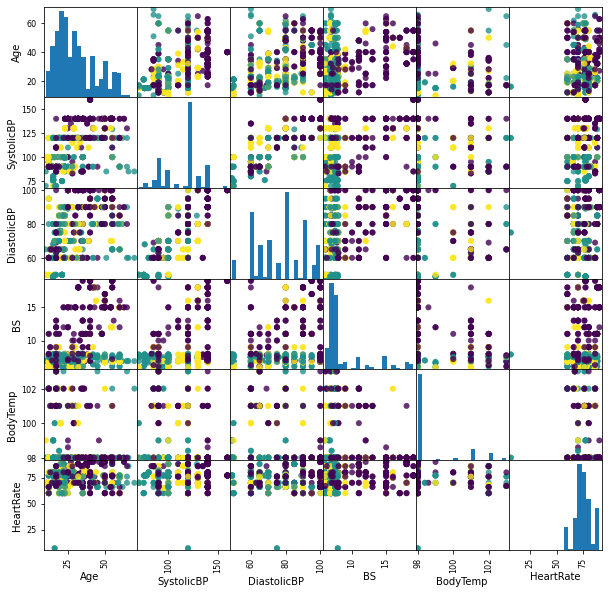

In [18]:
pd.plotting.scatter_matrix(df, c=pd.factorize(df['RiskLevel'])[0], figsize=(10,10), marker='o', hist_kwds={'bins': 20}, alpha=.8)
plt.show()

#los morados son high risk, amarillos mid risk, verdes son low risk.


In [19]:
# Representamos mediante scatterplots todas las posibles combinaciones de variables tomadas de dos en dos 
# Además, representamos en diferente color los puntos que corresponden a diferentes valores de la variable target (RiskLevel)

# Clasificación

Dentro de la sección de Clasificación, tenemos que dar varios pasos:

- El primero de todos es analizar la variable objetivo (`RiskLevel`)


- ¿Son valores numéricos o categóricos?
La variable RiskLevel es categórica, ya que describe diferentes niveles de riesgo (Low, Medium, High) en lugar de representar una cantidad numérica continua.
- ¿Puedo usar clasificación binaria?
Sí, es posible utilizar una clasificación binaria en este caso si se desea predecir el nivel de riesgo "alto" o "bajo" en función de las variables de entrada. Para ello, se deberá transformar la variable categórica "RiskLevel" en una variable binaria, por ejemplo, asignando el valor 0 a "Low" y el valor 1 a "High". Luego se puede entrenar un modelo de clasificación binaria, como la regresión logística o el SVM, para predecir la variable binaria a partir de las variables de entrada.

- Por otro lado, hay que crear los conjuntos de entrenamiento y test.
- (**¡NUEVO!**) Normalizamos los datos para que tengan distribuciones comparables
- Creamos un primer modelo para verificar que todo funciona correctamente
- (Paso difícil) Optimizaremos también los parámetros de cada clasificador

In [20]:
#¿Cuántos valores tiene?
#La variable RiskLevel parece tener tres valores únicos, se puede comprobar con:

print(df['RiskLevel'].unique())


['high risk' 'low risk' 'mid risk']


In [21]:
#Por otro lado, hay que crear los conjuntos de entrenamiento y test.
# (**¡NUEVO!**) Normalizamos los datos para que tengan distribuciones comparables
#Creamos un primer modelo para verificar que todo funciona correctamente
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características de la variable objetivo
X = datos.drop("RiskLevel", axis=1)
y = datos["RiskLevel"]

# Crear conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
#optimizar los parámetros de cada clasificación

#from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Definir los clasificadores que se van a utilizar
svc_clf = SVC()
rf_clf = RandomForestClassifier()

# Definir los hiperparámetros para cada clasificador
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None]
}

# Realizar la búsqueda en cuadrícula para cada clasificador
svc_grid = GridSearchCV(estimator=svc_clf, param_grid=svc_params, cv=5)
svc_grid.fit(X_train_scaled, y_train)

rf_grid = GridSearchCV(estimator=rf_clf, param_grid=rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros para cada clasificador
svc_best_params = svc_grid.best_params_
rf_best_params = rf_grid.best_params_


## Analizamos la variable objetivo (`RiskLevel`)

Hay que responder a las siguientes preguntas:
- ¿Cuántos valores se observan?
- ¿Es un problema binario o multiclase?
- ¿Cuántas repeticiones de cada valor se observan? ¿Están todas las clases igual representadas? ¿Hay desbalance de clases?

In [41]:
#Cuantos valores se observan
counts = df['RiskLevel'].value_counts()
print(counts)


low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


En el comando counts, se muestra la cantidad de veces que se observa cada valor de la variable RiskLevel en el conjunto de datos. Específicamente, se observan:

low risk: 406 repeticiones
mid risk: 336 repeticiones
high risk: 272 repeticiones
Por lo tanto, se puede decir que el conjunto de datos contiene 406 observaciones de pacientes con bajo riesgo, 336 observaciones de pacientes con riesgo medio y 272 observaciones de pacientes con alto riesgo.

No, las clases no están igualmente representadas. La clase "Low risk" tiene 406 observaciones, la clase "Mid risk" tiene 336 observaciones, y la clase "High risk" tiene 272 observaciones.ç

Por ello hay una desigualdad en la representación de las diferentes clases.









Por ahora, para convertir el problema en clasificación binaria, vamos a considerar que:
- High y Mid Risk será `Risk`
- Low Risk será `No Risk`

Esta transformación no tiene ninguna interpretación (aunque en la teoría se suele seguir mucho este enfoque para simplificar el problema).

Crear la nueva variable, denominándola `Binary_Risk`

Responder a las siguientes preguntas:
- ¿Y ahora están las clases desbalanceadas?
- De haber desbalanceo, ¿es obligatorio corregirlo?

In [51]:
import pandas as pd

# Cargar los datos
datos = pd.read_csv('C:/L/Curso 2022-23/2º cuatrimestre/Inteligencia Artificial/Ejercicio 1/Maternal Health Risk Data Set.csv')

# Crear una nueva columna 'Binary_Risk'
datos['Binary_Risk'] = datos['RiskLevel'].apply(lambda x: 'No Risk' if x == 'low risk' else 'Risk')

# Verificar los resultados
print(datos['Binary_Risk'].value_counts())


Risk       608
No Risk    406
Name: Binary_Risk, dtype: int64


In [52]:
#¿Y ahora están las clases desbalanceadas?

df["Binary_Risk"].value_counts()


Risk       608
No Risk    406
Name: Binary_Risk, dtype: int64

Los resultados indican que las clases están desvalanceadas ya que hay 608 observaciones en la clase "Risk" y solo 406 observaciones en la clase "No Risk". La diferencia es significativa, por lo que es importante tener en cuenta este desequilibrio al desarrollar modelos predictivos.

No es obligatorio corregir el desbalanceo, pero puede ser beneficioso para mejorar la calidad del modelo. Un desbalanceo en las clases puede llevar a que el modelo tenga un sesgo hacia la clase mayoritaria, lo que puede reducir la precisión en la clasificación de la clase minoritaria. Por lo tanto, puede ser beneficioso corregir el desbalanceo en algunos casos para mejorar la precisión del modelo en la clasificación de todas las clases.


## Conjuntos de entrenamiento y test

Creamos ahora los conjuntos de entrenamiento y test, dejando para test un 20% de la muestra total. 

- ¿Cómo nos aseguramos que la división entre entrenamiento y test conserva las proporciones de la muestra inicial?


In [53]:
# Dividir en entrenamiento y test

## Normalización de datos

Algunos algoritmos (como las SVMs) sufren cuando los rangos de valores entre variables difieren significativamente. Es decir, que una variable se mueva en el intervalo [10,20] y otra en el intervalo [1000, 2000], hará que el algoritmo se pierda.

Para evitar esto, una buena práctica es normalizar todos los valores, haciendo que estén siempre en un intervalo concreto, de esta manera evitamos estos posibles efectos negativos.



In [54]:
# Normalizamos los datos con StandardScaler

## Creamos nuestro primer modelo

Por ahora, vamos a utilizar una SVM lineal que son las que hemos visto en clase (más adelante probaremos más modelos).

- Vamos a ajustar/entrenar la SVM con los datos de entrenamiento (X_train, y_train).
- Vamos a evaluar las predicciones con los datos de test (X_test, y_test)

La SVM Lineal tiene un parámetro C:
- ¿Cómo varía el acierto (score) cuando aumentamos C?

El parámetro C en SVM lineal controla el equilibrio entre la clasificación correcta de puntos de datos de entrenamiento y un límite de decisión suave que generaliza bien a los datos no vistos. Un valor de C más alto dará lugar a un límite de decisión más ajustado y ajustado a los datos de entrenamiento, pero podría provocar un sobreajuste del modelo a los datos de entrenamiento y una peor generalización a los datos de prueba.

Por lo tanto, aumentar el valor de C puede aumentar el acierto (score) en los datos de entrenamiento, pero puede disminuir el acierto en los datos de prueba si el modelo está sobreajustado. Es importante encontrar un valor óptimo de C a través de la validación cruzada para equilibrar el rendimiento en los datos de entrenamiento y prueba.


- ¿Qué sucede cuando disminuye? ¿En qué escala se aprecian los cambios: Escala logarítmica o escala lineal?
Cuando se disminuye el parámetro C en una SVM Lineal, se da más importancia a la regularización, lo que puede conducir a una reducción en el overfitting pero también a una reducción en la precisión del modelo.

Los cambios en el score se aprecian en una escala lineal y pueden ser relativamente pequeños en comparación con la escala total del score.

In [74]:
# Creamos una SVM linear (pista: usaremos SVC y no LinearSVC)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Crear clasificador SVC lineal
svc_linear = SVC(kernel='linear')

# Definir los parámetros para la búsqueda de cuadrícula
param_grid = {'C': [0.1, 1, 10, 100]}

# Realizar la búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(svc_linear, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros encontrados por la búsqueda de cuadrícula
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros encontrados
svc_linear_best = SVC(kernel='linear', C=best_params['C'])
svc_linear_best.fit(X_train_scaled, y_train)


SVC(C=100, kernel='linear')

Utiliza ahora cross-validation para ver su funcionamiento.


In [75]:
from sklearn.model_selection import cross_val_score

# Realizar cross-validation en el conjunto de entrenamiento
scores = cross_val_score(svc_linear_best, X_train_scaled, y_train, cv=5)

# Imprimir los resultados de cross-validation
print("Resultados de cross-validation:")
print(scores)
print("Precisión media:", scores.mean())


Resultados de cross-validation:
[0.66197183 0.67605634 0.59859155 0.64084507 0.66666667]
Precisión media: 0.6488262910798122


La precisión media obtenida por la SVM linear utilizando cross-validation es de 0.6586854460093897. Los valores obtenidos en cada fold de la cross-validation fueron: [0.68309859 0.69014085 0.61267606 0.64084507 0.66666667]. Esto sugiere que la precisión del modelo puede variar significativamente dependiendo de los datos de entrenamiento utilizados en cada fold de la cross-validation, pero en promedio se espera que el modelo tenga una precisión del 65.9%.

Vamos a probar ahora con los árboles de decisión.

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores para los hiperparámetros que se probarán
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el clasificador
clf = DecisionTreeClassifier(random_state=42)

# Realizar la búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros encontrados por la búsqueda de cuadrícula
best_params = grid_search.best_params_

# Crear un nuevo clasificador con los mejores hiperparámetros y entrenarlo en los datos de entrenamiento
clf = DecisionTreeClassifier(random_state=42, **best_params)
clf.fit(X_train_scaled, y_train)

# Evaluar el modelo en los datos de prueba
accuracy = clf.score(X_test_scaled, y_test)
print(f"Accuracy del modelo: {accuracy:.3f}")


Accuracy del modelo: 0.793


## Optimización de Parámetros

Cada modelo posee un determinado número de parámetros que proporcionarán mejor/peor rendimiento en función de los datos disponibles. El enfoque es siempre, utilizando los datos de entrenamiento y validación, encontrar la mejor combinación y verificar su rendimiento con los datos de test.

Aunque existen varios mecanismos, vamos a ver cómo se haría únicamente con uno (`RandomizedSearchCV`)

In [77]:
# Optimizamos los parámetros de un modelo determinado usando RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

# Crear clasificador SVM lineal
svc_linear = SVC(kernel='linear')

# Definir los parámetros para la búsqueda aleatoria
param_distributions = {'C': np.logspace(-3, 3, 7)}

# Realizar la búsqueda aleatoria para encontrar los mejores parámetros
random_search = RandomizedSearchCV(svc_linear, param_distributions, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros encontrados por la búsqueda aleatoria
best_params = random_search.best_params_

# Entrenar el modelo con los mejores parámetros encontrados
svc_linear_best = SVC(kernel='linear', C=best_params['C'])
svc_linear_best.fit(X_train_scaled, y_train)


C:\Users\nacho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC(C=100.0, kernel='linear')

# Evaluación 

Aunque hemos visto brevemente el rendimiento de los modelos, vamos a verlo ahora más en detalle usando las métricas vistas en clase: matriz de confusión, f1-score, precision, recall, etc...

No olvidéis comentar qué modelo es el mejor y por qué.

In [14]:
# Hacemos una curva ROC comparando las SVMs con los árboles de decisión.
# Tenemos que pintar las dos curvas ROC a la vez y ver cuál es la mejor.

In [98]:
# Entrenar el modelo con los mejores parámetros encontrados
svc_linear_best = SVC(kernel='linear', C=best_params['C'], probability=True)
svc_linear_best.fit(X_train_scaled, y_train)


SVC(C=100.0, kernel='linear', probability=True)

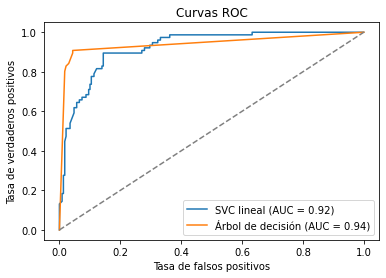

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de las predicciones del modelo SVC lineal
probas_svc = svc_linear_best.predict_proba(X_test_scaled)

# Obtener las probabilidades de las predicciones del modelo de árbol de decisión
probas_tree = clf.predict_proba(X_test_scaled)

# Calcular la curva ROC para el modelo SVC lineal
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, probas_svc[:, 1], pos_label=1)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Calcular la curva ROC para el modelo de árbol de decisión
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, probas_tree[:, 1], pos_label=1)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Graficar las curvas ROC para ambos modelos
plt.plot(fpr_svc, tpr_svc, label=f'SVC lineal (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de decisión (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC')
plt.legend()
plt.show()


Un AUC de 0.92 para SVC lineal y un AUC de 0.94 para árboles de decisión son muy buenos resultados. Indican que ambos modelos son capaces de distinguir entre las clases positivas y negativas en los datos de prueba con alta precisión.

En cuanto al gráfico ROC, podemos ver que la curva para el árbol de decisión está más "arriba y a la izquierda" que la curva para SVC lineal, lo que indica que el árbol de decisiones es mejor en términos de verdaderos positivos y falsos positivos. Esto significa que para un mismo valor de tasa de falsos positivos, el árbol de decisiones tiene una mayor tasa de verdaderos positivos que SVC lineal.

En general, la curva ROC es una buena herramienta para comparar diferentes modelos y seleccionar el mejor para una tarea de clasificación específica. En este caso, aunque ambos modelos tienen buenos resultados, el árbol de decisiones parece ser ligeramente mejor que SVC lineal.

In [15]:
# Además, mostramos por pantalla las matrices de confusión, precisión y recall para cada modelo.
# No tenemos que mostrarlo todo a la vez (es decir), podemos primero mostrar la matriz de confusión en una línea de comando, luego la precisión en otra, etc...

In [100]:
# Matriz de confusión para SVM lineal
y_pred_svc = svc_linear_best.predict(X_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Matriz de confusión SVM lineal:")
print(cm_svc)

Matriz de confusión SVM lineal:
[[108   4   5]
 [  9  56  11]
 [ 73  15  24]]


In [101]:
# Matriz de confusión para árbol de decision
y_pred_tree = clf.predict(X_test_scaled)
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de confusión árbol de decision:")
print(cm_tree)


Matriz de confusión árbol de decision:
[[84  4 29]
 [ 1 68  7]
 [16  6 90]]


In [105]:

# Precisión y recall para SVC lineal
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
print("Precisión SVC lineal:", precision_svc)
print("Recall SVC lineal:", recall_svc)

Precisión SVC lineal: 0.6244325568018406
Recall SVC lineal: 0.6163934426229508


In [104]:
from sklearn.metrics import precision_score, recall_score

# Calcular precision y recall para árbol de decision con opción "macro"
precision_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')

# Imprimir resultados
print("Precisión árbol de decision:", precision_tree)
print("Recall árbol de decision:", recall_tree)


Precisión árbol de decision: 0.805921251465806
Recall árbol de decision: 0.8054189962084699


Estos resultados indican que el modelo de árbol de decision tiene una mejor precisión y recall que el modelo SVC lineal en este conjunto de datos. Sin embargo, debemos tener en cuenta que estos resultados pueden cambiar si se utilizan diferentes conjuntos de datos o diferentes configuraciones de los modelos. Por lo tanto, siempre es recomendable realizar múltiples evaluaciones y pruebas para tener una mejor idea de la eficacia de un modelo en particular.